In [1]:
import pandas as pd
import numpy as np #분석환경 구축

In [3]:
customer=pd.read_csv('./customer.csv') #데이터파일 불러오기

In [4]:
print(customer)#데이터자료의 개괄적인 탐색,  200개의 개체와 5개의 변수가 있다. 

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [5]:
customer.index

RangeIndex(start=0, stop=200, step=1)

In [6]:
customer.columns #변수확인

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [25]:
customer.CustomerID=customer.CustomerID.astype(str) #기초 통계량 확인전에 의미없는 변수는 문자로 바꿔주기.

In [26]:
print(customer.mean()) #각 변수별 평균확인. 참고로 gender는 범주형이기 때문에 나타나지 않음.

CustomerID                  inf
Age                       38.85
Annual Income (k$)        60.56
Spending Score (1-100)    50.20
dtype: float64


In [45]:
Age_Rank=customer['Age'].value_counts()[:10] #제일 많이 이용한 나이대 Top 10 보여주기

In [46]:
for idx, (val,cnt) in enumerate(Age_Rank.iteritems(),1):
    print("Top",idx, ':', val, cnt)

Top 1 : 32 11
Top 2 : 35 9
Top 3 : 19 8
Top 4 : 31 8
Top 5 : 30 7
Top 6 : 49 7
Top 7 : 27 6
Top 8 : 47 6
Top 9 : 40 6
Top 10 : 23 6


In [48]:
Annual_Rank=customer['Annual Income (k$)'].value_counts()[:10] #이용 고객의 연봉 Top10 나타내기, k$=1000$라는 뜻

In [50]:
for idx, (val,cnt) in enumerate(Annual_Rank.iteritems(),1):
    print('Top', idx, ':', val, cnt)

Top 1 : 54 12
Top 2 : 78 12
Top 3 : 60 6
Top 4 : 87 6
Top 5 : 62 6
Top 6 : 63 6
Top 7 : 71 6
Top 8 : 48 6
Top 9 : 33 4
Top 10 : 19 4


In [56]:
Spending_Rank=customer['Spending Score (1-100)'].value_counts()[:10]
for idx, (val,cnt) in enumerate(Spending_Rank.iteritems(),1):
    print('Top', idx, ':', val, cnt)
    #Spending Score은 손님들의 소비 습관이나 행태에 따른 점수를 부여한 것이다.
    #가장 많은 빈도를 보여준 점수 Top10을 출력해본다.

Top 1 : 42 8
Top 2 : 55 7
Top 3 : 46 6
Top 4 : 73 6
Top 5 : 35 5
Top 6 : 52 5
Top 7 : 59 5
Top 8 : 48 5
Top 9 : 75 5
Top 10 : 50 5


In [57]:
print(customer.info()) #분석에 앞서 데이터 전처리를 위한 탐색과정. 결측값이 없었다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    object
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB
None


In [59]:
customer.describe() #전처리 단계에서 결측값이나 변수 변환작업이 필요없다고 판단하여  수치형 자료들의
                    #기초 통계량을 다시한번 확인해 본다.

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [69]:
customer.var() #자료의 범주별 분산과 표준편차를 구해본다.

Age                       195.133166
Annual Income (k$)        689.835578
Spending Score (1-100)    666.854271
dtype: float64

In [70]:
customer.std()

Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

In [78]:
 customer.cov() #범주간 공분산을 구해본다.

,Age,Annual Income (k$),Spending Score (1-100)
Age,195.133166,-4.548744,-118.040201
Annual Income (k$),-4.548744,689.835578,6.716583
Spending Score (1-100),-118.040201,6.716583,666.854271


In [79]:
customer.corr() #범주간 상관관계를 구해본다.

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [100]:
gen=customer.Gender
gen

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

In [169]:
gender=gen.replace('Male',0).replace('Female',1) #Male 과 Female을 0과 1로 나타내는 작업
age=customer.Age
#income=customer.Annual Income (k$)
#score=customer.Spending Score (1-100)

In [171]:
income=customer['Annual Income (k$)']

In [172]:
score=customer['Spending Score (1-100)']

In [174]:
print(gender)
print(age)
print(income)
print(score)

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: int64
0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64
0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64
0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64


In [182]:
gender.cov(age) #성별과 나이의 상관관계, 통계적 의미는 없다.

-0.4231155778894477

In [183]:
gender.cov(income) #성별과 수입의 관계, 통계적 의미는 없다.

-0.7372864321608037

In [184]:
gender.cov(score) # 성별과 고객점수의 관계성, 어느정도 영향이 있다.

0.7467336683417085

In [185]:
gender.corr(score) #하지만 상관관계(변수간의 선형성)는 높지 않아 보인다.

0.05810873926162087

In [191]:
newdata=pd.DataFrame({'Sex' : gender, 'Age' : age, 'Income' : income, 'Score' : score})
#데이터 전처리를 마친후 다시 하나의 데이터셋으로 합쳐주는 작업

In [192]:
newdata

,Sex,Age,Income,Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [221]:
cov=newdata.cov() #새로만든 데이터 셋 간의 공분산과 상관관계를 막대차트로 나타내기 위하여 새로운 이름 설정

In [220]:
corr=newdata.corr()

In [195]:
%matplotlib inline
import matplotlib.pyplot as plt

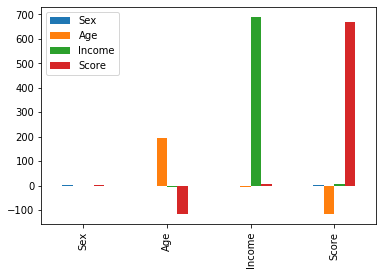

In [223]:
cov.plot.bar()  #공분산의 바차트

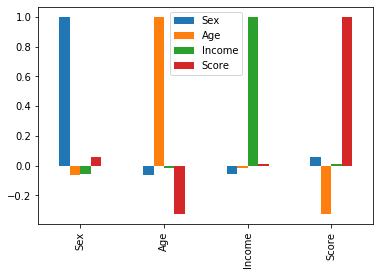

In [224]:
corr.plot.bar() #상관관계 바차트,변수간의 상관관계는 크게 높지 않고, 성별과 점수간의 영향이 어느정도 있을 뿐

In [228]:
#PCA분석에 앞서서 필요한 모듈을 불러온후 정규화 작업을 실시한다.
from sklearn.preprocessing import StandardScaler
newdata_std=StandardScaler().fit_transform(newdata)
newdata_std #정규화작업

array([[-1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [ 0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [ 0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [ 0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [ 0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [ 0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [ 0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [ 0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [ 0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [ 0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [ 0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [-1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [-1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [ 0.88640526, -0.

In [229]:
Tnewdata=newdata_std.T
cov_mat=np.cov(Tnewdata)
print(cov_mat) #공분산 행렬을 만들어 준다.

[[ 1.00502513 -0.06117325 -0.05669328  0.05840074]
 [-0.06117325  1.00502513 -0.01246034 -0.3288712 ]
 [-0.05669328 -0.01246034  1.00502513  0.00995261]
 [ 0.05840074 -0.3288712   0.00995261  1.00502513]]


In [232]:
eigval, eigvec=np.linalg.eig(cov_mat)

In [233]:
print('Eigenvectors \n%s' %eigvec)

Eigenvectors 
[[ 0.23430156 -0.62688553 -0.74300906  0.00740532]
 [-0.68790025 -0.10368955 -0.12238438  0.70785859]
 [ 0.00608217  0.7652519  -0.64366712  0.00672133]
 [ 0.68691996  0.10321115  0.13657317  0.70628337]]


In [236]:
print('Eigenvalues \n%s' %eigval)

Eigenvalues 
[1.35437369 1.05449828 0.93510105 0.67612749]


In [237]:
eigval[0]/sum(eigval) #첫번째 고유값의 정보량의 크기가 33%이다.

0.33690045571012545

In [238]:
eigval[1]/sum(eigval) #두번째 고유값의 정보량의 크기가 26%정도이다.

0.2623064462718589

In [239]:
eigval[2]/sum(eigval) #세번째 고유값의 정보량의 크기가 23%이다.

0.23260638590261043

In [240]:
eigval[3]/sum(eigval)#네번째 고유값의 정보량의 크기가 16%이다.

0.16818671211540515

In [249]:
import sklearn.datasets
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt #요인분석을 위하여 anaconda 프롬프트 에서 pip install factor_analyzer를 해준다.

In [425]:
datafactor=FactorAnalyzer(n_factors=2, rotation='varimax')#요인을 2개정도로 설정해본다.

In [448]:
import sklearn
from sklearn.decomposition import FactorAnalysis
from sklearn import datasets
datafactor=FactorAnalysis().fit(newdata_std)
factormat=pd.DataFrame(datafactor.components_,columns = newdata.columns)
Tfactormat=factormat.T
Tfactormat #성별과 나이, 수입과 점수의 요인으로 나누어 볼 수 있을 것 같다.
           #즉, 네개의 변수를 사람의 내적 성질(나이, 성별)과 외적 성질(수입, 고객점수)로 나눌 수 있다.

,0,1,2,3
Sex,-0.123984,-0.198394,0.0,-0.0
Age,0.496205,-0.019617,0.0,-0.0
Income,-0.010376,0.210493,0.0,-0.0
Score,-0.495444,0.019686,-0.0,-0.0


In [430]:
load=datafactor.loadings_

In [431]:
val,vec=datafactor.get_eigenvalues()

In [432]:
xvals=range(1, newdata.shape[1]+1)

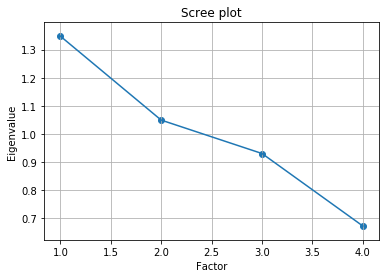

In [433]:
plt.scatter(xvals, val)
plt.plot(xvals, val)
plt.title('Scree plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()
#고유값을 1이상 갖는것이 두개 있었다. ->요인이 두개

In [265]:
from sklearn.cluster import KMeans #군집분석을 위한 환경 구축

In [269]:
cluster= KMeans(n_clusters=2)
y_cluster=cluster.fit_predict(newdata_std)

In [270]:
y_cluster #2개의 군집화를 했을때 

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [276]:
cluster=KMeans(n_clusters=3)
y_cluster=cluster.fit_predict(newdata_std)
y_cluster

array([2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 1, 1, 0, 2,
       1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 1, 2,
       2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 0, 2, 2, 1, 0, 2, 0, 2, 1, 0, 0, 0,
       0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2,
       1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2])

In [277]:
cluster=KMeans(n_clusters=4)
y_cluster=cluster.fit_predict(newdata_std)
y_cluster     

array([0, 0, 1, 2, 1, 2, 1, 2, 3, 2, 3, 2, 1, 2, 3, 0, 1, 0, 3, 2, 3, 0,
       1, 0, 1, 0, 1, 0, 1, 2, 3, 2, 3, 0, 1, 2, 1, 2, 1, 2, 1, 0, 3, 2,
       1, 2, 1, 2, 2, 2, 1, 0, 2, 3, 1, 3, 1, 3, 2, 3, 3, 0, 1, 1, 3, 0,
       1, 1, 0, 2, 3, 1, 1, 1, 3, 0, 1, 3, 2, 1, 3, 0, 3, 1, 2, 3, 1, 2,
       2, 1, 1, 0, 3, 1, 2, 0, 1, 2, 3, 0, 2, 1, 3, 0, 3, 2, 1, 3, 3, 3,
       3, 2, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 3, 0, 3, 0, 3, 0,
       2, 2, 3, 2, 1, 0, 3, 2, 1, 0, 2, 2, 3, 0, 3, 2, 1, 0, 3, 0, 1, 2,
       1, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 0, 3, 0, 3, 0, 1, 2,
       3, 0, 3, 0, 1, 2, 3, 2, 1, 0, 1, 0, 1, 2, 1, 2, 3, 2, 1, 2, 1, 0,
       3, 0])

In [300]:
cluster=KMeans(n_clusters=5)
y_cluster=cluster.fit_predict(newdata_std)
y_cluster

array([1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 0, 1, 3, 1, 0, 1, 3, 1, 0, 1, 0, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1,
       3, 1, 3, 1, 1, 1, 3, 1, 1, 0, 3, 0, 3, 0, 1, 0, 0, 1, 3, 3, 0, 1,
       3, 3, 1, 1, 0, 3, 3, 3, 0, 1, 3, 0, 1, 3, 0, 0, 0, 3, 1, 0, 3, 1,
       1, 3, 3, 1, 0, 3, 3, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0, 1, 3, 0, 0, 0,
       0, 1, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 4, 2, 4, 0, 4, 0, 4, 0, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 3, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 3, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       0, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [301]:
cluster=KMeans(n_clusters=6)
y_cluster=cluster.fit_predict(newdata_std)
y_cluster #자료의 수를 균등하게 나뉠때 까지 군집을 나누어 본다.

array([0, 0, 3, 3, 3, 3, 1, 3, 4, 3, 4, 3, 1, 3, 4, 0, 3, 0, 4, 3, 4, 0,
       1, 0, 1, 0, 1, 0, 1, 3, 4, 3, 4, 0, 1, 3, 1, 3, 1, 3, 1, 0, 4, 3,
       1, 3, 1, 3, 3, 3, 1, 0, 3, 4, 1, 4, 1, 4, 3, 4, 4, 0, 1, 1, 4, 0,
       1, 1, 0, 3, 4, 1, 1, 1, 4, 0, 1, 0, 3, 1, 4, 0, 4, 1, 3, 4, 1, 3,
       3, 1, 1, 0, 4, 1, 3, 0, 1, 3, 4, 0, 3, 1, 4, 0, 4, 3, 1, 4, 4, 4,
       4, 3, 1, 0, 3, 3, 1, 1, 1, 1, 0, 1, 5, 0, 3, 5, 2, 0, 4, 0, 2, 0,
       3, 5, 2, 5, 1, 0, 2, 5, 1, 0, 3, 5, 2, 0, 2, 5, 1, 0, 2, 0, 1, 5,
       1, 5, 2, 5, 2, 5, 1, 5, 2, 5, 2, 5, 2, 5, 1, 0, 2, 0, 2, 0, 1, 5,
       2, 0, 2, 0, 5, 5, 2, 5, 5, 0, 1, 0, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5])

In [312]:
group=y_cluster

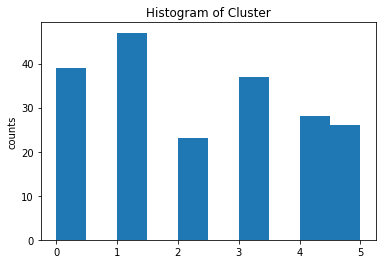

In [320]:
plt.hist(group)
plt.ylabel('counts')
plt.title('Histogram of Cluster')
plt.show() 

In [359]:
grouping=pd.DataFrame({'Cluster' : group}) #각 군집별 데이터셋을 만들어 본다.

In [376]:
group_zero=grouping[grouping<1].dropna() #군집 0~5까지 데이터셋을 나누기
group_zero

,Cluster
0,0.0
1,0.0
15,0.0
17,0.0
21,0.0
23,0.0
25,0.0
27,0.0
33,0.0
41,0.0


In [378]:
group_one=grouping[grouping==1].dropna()
group_one

,Cluster
6,1.0
12,1.0
22,1.0
24,1.0
26,1.0
28,1.0
34,1.0
36,1.0
38,1.0
40,1.0


In [380]:
group_two=grouping[grouping==2].dropna()
group_three=grouping[grouping==3].dropna()
group_four=grouping[grouping==4].dropna()
group_five=grouping[grouping==5].dropna()

In [389]:
group_zero.head(10) #이제 각 군집의 10개의 개체를 뽑아본다.

,Cluster
0,0.0
1,0.0
15,0.0
17,0.0
21,0.0
23,0.0
25,0.0
27,0.0
33,0.0
41,0.0


In [390]:
group_one.head(10)

,Cluster
6,1.0
12,1.0
22,1.0
24,1.0
26,1.0
28,1.0
34,1.0
36,1.0
38,1.0
40,1.0


In [392]:
group_two.head(10)

,Cluster
126,2.0
130,2.0
134,2.0
138,2.0
144,2.0
146,2.0
150,2.0
156,2.0
158,2.0
162,2.0


In [393]:
group_three.head(10)

,Cluster
2,3.0
3,3.0
4,3.0
5,3.0
7,3.0
9,3.0
11,3.0
13,3.0
16,3.0
19,3.0


In [394]:
group_four.head(10)

,Cluster
8,4.0
10,4.0
14,4.0
18,4.0
20,4.0
30,4.0
32,4.0
42,4.0
53,4.0
55,4.0


In [396]:
group_five.head(10)

,Cluster
122,5.0
125,5.0
133,5.0
135,5.0
139,5.0
143,5.0
147,5.0
153,5.0
155,5.0
157,5.0


In [401]:
zero=newdata.iloc[[0,1,15,17,21,23,25,27,33,41]] #추출한 10개에 해당하는 고객 정보를 다시 탐색한다.
zero

,Sex,Age,Income,Score
0,0,19,15,39
1,0,21,15,81
15,0,22,20,79
17,0,20,21,66
21,0,25,24,73
23,0,31,25,73
25,0,29,28,82
27,0,35,28,61
33,0,18,33,92
41,0,24,38,92


In [403]:
one=newdata.iloc[[6,12,22,24,26,28,34,36,38,40]]
one

,Sex,Age,Income,Score
6,1,35,18,6
12,1,58,20,15
22,1,46,25,5
24,1,54,28,14
26,1,45,28,32
28,1,40,29,31
34,1,49,33,14
36,1,42,34,17
38,1,36,37,26
40,1,65,38,35


In [405]:
two=newdata.iloc[[126,130,134,138,144,146,150,156,158,162]]
two

,Sex,Age,Income,Score
126,0,43,71,35
130,0,47,71,9
134,0,20,73,5
138,0,19,74,10
144,0,25,77,12
146,0,48,77,36
150,0,43,78,17
156,0,37,78,1
158,0,34,78,1
162,0,19,81,5


In [407]:
three=newdata.iloc[[2,3,4,5,7,9,11,13,16,19]]
three

,Sex,Age,Income,Score
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
5,1,22,17,76
7,1,23,18,94
9,1,30,19,72
11,1,35,19,99
13,1,24,20,77
16,1,35,21,35
19,1,35,23,98


In [409]:
four=newdata.iloc[[8,10,14,18,20,30,32,42,53,55]]
four

,Sex,Age,Income,Score
8,0,64,19,3
10,0,67,19,14
14,0,37,20,13
18,0,52,23,29
20,0,35,24,35
30,0,60,30,4
32,0,53,33,4
42,0,48,39,36
53,0,59,43,60
55,0,47,43,41


In [411]:
five=newdata.iloc[[122,125,133,135,139,143,147,153,155,157]]
five

,Sex,Age,Income,Score
122,1,40,69,58
125,1,31,70,77
133,1,31,72,71
135,1,29,73,88
139,1,35,74,72
143,1,32,76,87
147,1,32,77,74
153,1,38,78,76
155,1,27,78,89
157,1,30,78,78


In [414]:
zero.describe() #추출한 10개의 군집별 기초통계량 확인

,Sex,Age,Income,Score
count,10.0,10.000000,10.000000,10.000000
mean,0.0,24.400000,24.700000,73.800000
std,0.0,5.621388,7.394442,15.795921
min,0.0,18.000000,15.000000,39.000000
25%,0.0,20.250000,20.250000,67.750000
50%,0.0,23.000000,24.500000,76.000000
75%,0.0,28.000000,28.000000,81.750000
max,0.0,35.000000,38.000000,92.000000


In [412]:
one.describe()

,Sex,Age,Income,Score
count,10.0,10.000000,10.000000,10.000000
mean,1.0,47.000000,29.000000,19.500000
std,0.0,9.672412,6.716481,10.803806
min,1.0,35.000000,18.000000,5.000000
25%,1.0,40.500000,25.750000,14.000000
50%,1.0,45.500000,28.500000,16.000000
75%,1.0,52.750000,33.750000,29.750000
max,1.0,65.000000,38.000000,35.000000


In [413]:
two.describe()

,Sex,Age,Income,Score
count,10.0,10.000000,10.000000,10.000000
mean,0.0,33.500000,75.800000,13.100000
std,0.0,11.834507,3.359894,12.784105
min,0.0,19.000000,71.000000,1.000000
25%,0.0,21.250000,73.250000,5.000000
50%,0.0,35.500000,77.000000,9.500000
75%,0.0,43.000000,78.000000,15.750000
max,0.0,48.000000,81.000000,36.000000


In [415]:
three.describe()

,Sex,Age,Income,Score
count,10.0,10.000000,10.000000,10.000000
mean,1.0,27.800000,18.600000,67.400000
std,0.0,6.014797,2.270585,30.718073
min,1.0,20.000000,16.000000,6.000000
25%,1.0,23.000000,17.000000,48.000000
50%,1.0,27.000000,18.500000,76.500000
75%,1.0,34.000000,19.750000,89.750000
max,1.0,35.000000,23.000000,99.000000


In [416]:
four.describe()

,Sex,Age,Income,Score
count,10.0,10.000000,10.000000,10.000000
mean,0.0,52.200000,29.300000,23.900000
std,0.0,10.737266,9.718825,19.255302
min,0.0,35.000000,19.000000,3.000000
25%,0.0,47.250000,20.750000,6.250000
50%,0.0,52.500000,27.000000,21.500000
75%,0.0,59.750000,37.500000,35.750000
max,0.0,67.000000,43.000000,60.000000


In [417]:
five.describe()

,Sex,Age,Income,Score
count,10.0,10.000000,10.000000,10.000000
mean,1.0,32.500000,74.500000,77.000000
std,0.0,4.034573,3.407508,9.416298
min,1.0,27.000000,69.000000,58.000000
25%,1.0,30.250000,72.250000,72.500000
50%,1.0,31.500000,75.000000,76.500000
75%,1.0,34.250000,77.750000,84.750000
max,1.0,40.000000,78.000000,89.000000


In [ ]:
#군집 0의 경우 남성 20대 초반이며, 평균 2400만원 정도의 연봉(1달러당 1000원 가정) 이며 고객점수가 준수했다.
#군집 1의 경우 여성 40대 후반이며, 평균 3000만원에 가까운 연봉이고, 고객점수가 상당히 낮았다.
#군집 2의 경우 남성 30대 초반이며, 평균 7500만원에 가까운 연봉임에도 불구하고, 고객 점수가 제일 낮았다.
#군집 3의 경우 여성 20대 후반이며, 평균 1800만원에 가까운 연봉이고, 고객점수가 군집간 평균 이상이었다.
#군집 4의 경우 남성 50대 초반이며, 평균  3000만원에 가까운 연봉이고, 고객점수가 낮았다.
#군집 5의 경우 여성 30대 초반이며, 평균 7450만원에 가까운 연봉이고, 고객점수가 제일 높았다.